# Pandas, NymPy, Matplotlib, scikit_learn etc

En kort introduktion till några vanliga data science bibliotek som är vanliga vid data wrangling

## NymPy

In [1]:
import numpy as np

NumPy står får Numerical Python och är ett bibliotek för att utföra avacerade matematiska operationer på arrayer och matriser. En fördel är också att NymPy stöder många fler datatyper än Pythons egna. 

Några operationer som kan utföras med nymPy:
    
>
>* Matematiska och logiska operationer på arrayer.
>
>* Fouriertransformeringar och rutiner för att manipulera former
>
>* Linjär algebra
> 
>* Randomiserad talgenerering
>

Det viktigaste objektet i NymPy är en array med n-dimensioner, den kan skapas såhär:

* 1-dimensionell array

~~~
a = np.array([1,2,3]) 

output: a = [1, 2, 3]
~~~

* 2-dimensionell array (matris)

~~~
a = np.array([[1, 2], [3, 4]]) 

output: a = 
[[1, 2] 
 [3, 4]]
~~~

Andra bra funktioner för att ta reda på viktig information och hantera data är exempelvis:
    
>
>Dimensionerna av en array (ges i form av en tuple) `np.shape`
>
>Förändra dimensioner i en array `np.reshape()`
>
>Skapa en array med jämt fördelade objekt `np.arange([start, ]stop, [step, ], dtype=None)`
>
>Skapa en array från andra typer av samlingar (listor, tuples etc) `np.asarray()`
>
>För att dela en numPy array kan slice användas ex. `np[:2]` skulle välja ut de första positionerna, se också nedan:

>>
>* `s[i]` (indexing)
>* `s[i:j]` (slicing)
>* `s[i:j:k]` (step slicing)
>* meaning of negative indices
>* Index startar alltid på 0
>
>
>Statistiska beräkningar
>* np.min() - minsta elementet
>
>* np.max() - största elementet
>
>* np.mean() - medel av alla element
>
>* np.std() - standardavvikelse
>
>* np.sum() - summan av alla element
>
>Det går också att göra olika matematiska operationer såsom + på numPy arrayer och därmed även matrisoperationer (linjär algebra).



## Pandas

In [2]:
import pandas as pd

Pandas är det absolut vanligaste biblioteket för data science. Biblioteket hantera flera olika typer av dataset, exempelvis csv, excel, sql eller till och med en webbsida.

Några operationer som kan utföras med Pandas:

>* Input data
>* Overview of data
>* Handling missing values
>* Combining DataFrames
>* Selecting data on a DataFrame
>* Reshaping a DataFrame
>* ...


*Pandas is built on top of the **NumPy** package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in **Scikit-learn**.* (från [Learn Data Science](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/))


### Dataframes and Series
De två dataformat man generellt arbetar med i Pandas är `Series` som representerar en kolumn medan `Dataframes` är  tabeller med kolumner och rader (alltså flera series). Vanligast är dock inte att själv skapa olika dataframes, även om det pockså är möjligt. Istället läser man in data i en dataframe för att sedan kuna utföra olika operationer, som kan syfta till att lära känna sin data och förbereda den för analys.


För att skapa en Series från en:

* list

~~~
test_list = [100,200,300]
pd.Series(data=test_list)
~~~

* dictionary

~~~
dictionary = {‘a’:100,’b’:200,’c’:300}
pd.Series(data=dictionary)
~~~

För att skapa en Dataframe från en: 

* list

~~~
data = [[‘elin’, 10], [‘alva’, 20], [‘niklas’, 30]] 
df = pd.DataFrame(data, columns = [‘Name’, ‘Age’])
~~~

* dictionary

~~~
data = {‘Name’:[‘thomas’, ‘elin’, ‘august’, ‘nils’], ‘Age’:[10, 20, 30, 40]} 
df = pd.DataFrame(data)
~~~

In [3]:
data = {'Name':['thomas', 'elin', 'august', 'nils'], 'Age':[10, 20, 30, 40]} 
name_age = pd.DataFrame(data)
name_age.head()

,Name,Age
0,thomas,10
1,elin,20
2,august,30
3,nils,40


Pandas skapar sitt eget index genom att lägga till en indexkolumn, men om man istället vill ange sitt eget index går det också bra: 

In [4]:
name_index=name_age.set_index('Name')
name_index.head()

,Age
Name,
thomas,10
elin,20
august,30
nils,40


Eller skapa ett eget index:

In [5]:
employees = pd.DataFrame(data, index=['emplyee_1', 'emplyee_2', 'emplyee_3', 'emplyee_4'])
employees.head()

,Name,Age
emplyee_1,thomas,10
emplyee_2,elin,20
emplyee_3,august,30
emplyee_4,nils,40


Det går att välja ut specifika delar av en DataFrame med hjälp av  loc[] och iloc[]
* `loc[]` väljer ut baserat på namn (label)
* `iloc[]` väljer ut data baserat på position (index)



In [6]:
employees.loc['emplyee_1']

Name    thomas
Age         10
Name: emplyee_1, dtype: object

In [7]:
employees.iloc[1:4]

,Name,Age
emplyee_2,elin,20
emplyee_3,august,30
emplyee_4,nils,40


Andra bra funkttioner för att ta reda på viktig information om det dataset ni arbetar med är exempelvis:

`pandas.DataFrame`
>
>Hämta antal rader, kolumner etc: `df.info()`
>
>Hämta antalet rader: `len(df)`
>
>Hämta antalet kolumner: `len(df.columns)`
>
>Hämta antal rader och kolumner: `df.shape`
>
>Hämta antalet element: `df.size`
>
>Hämta de första raderna: `head()`  
>
>Hämta de sista raderna: `tail()`
>
> Slice går också att använda för att få ett specificerat antal rader. Ex: `df[50:55]`
>
>
>
>

`pandas.Series`
>
>Hämta antalet element: `len(s)`, `s.size`

## Läsa och skriva 

För att läsa in data (och även kunna skriva till olika format) har Pandas en mängd olika readers och writers. Ni har sett en av de vanligaste i laboration 1, read_csv(). Andra exempel är: 

| format 	| data  description 	| reader       	| writer     	|
|--------	|-------------------	|--------------	|------------	|
|  text  	| csv               	| read_csv()   	| to_csv()   	|
|  text  	| JSON              	| read_json()  	| to_json()  	|
|  text  	| HTML              	| read_html()  	| to_html()  	|
| binary 	| MS Excel          	| read_excel() 	| to_excel() 	|
| SQL    	| SQL               	| read_sql()   	| to_sql()   	|

För att läsa in en fil ska sökvägen till filen anges i parantesen, om filen ligger i samma directory som den notebook du kör räcker det att ange filens namn.  
ex.
~~~
df = pd.read_csv("olympics.csv")
~~~

Det finns en mängd andra parametrar som kan användas för att exempelvis läsa in delar av en fil, ange separator, ange hur text ska parsas (ex göras till datumformat) etc. Arbetar man med filer som innehåller extremt många rader kan man också läsa en enbart en del av dessa med hjälp av attributet `nrows`:
~~~
df = pd.read_csv("olympics.csv", usecols=cols, nrows=10) 
~~~

In [8]:
olympics = pd.read_csv("Data_code_along/olympics.csv", header = 1)
#visar fem första raderna
olympics.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## Få en översikt av sin data


`df.describe()`ger ett första intyck av den data som lästs in i en dataframe genom att beräkna ett antal intressanta statistiska mätvärden för dataframen, exempelvis medelvärde, antal värden, min och max etc. 

`df.value_counts()`visar hur många värden som finns av varje typ i en viss column (räknar den inte NaN, alltså saknade värden i default, det måste ställas in) 

`df.dtypes` är också viktig då den visar vilka datatyper de olika attributen har i en dataframe

`df.size` returnerar antalet element, alltså rader * antalet kolumner 

`df.shape` returnerar en tuple med (rows, columns) av en dataframe eller series

`df.ndim`returnerar dimensionen av en dataframe eller series

`df.index` returnerar index, alltså namnen på alla attribut

`df.columns`kolumnnamn (vilket är index) 

`df.values` returnerar den underliggande numpy arrayen (dataframes lagras som numpy arrays)

`df.column_x.nunique()`   räknar antalet unika värden i kolumnen

`df.column_x.unique()`    returnerar alla unika värden i kolumnen

In [9]:
olympics.describe()

,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,13.476190,65.428571,64.965986,69.795918,200.190476,6.700680,13.047619,13.034014,12.897959,38.979592,20.176871,78.476190,78.000000,82.693878,239.170068
std,7.072359,405.549990,399.309960,427.187344,1231.306297,7.433186,80.799204,80.634421,79.588388,240.917324,13.257048,485.013378,478.860334,505.855110,1469.067883
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,1.000000,2.500000
50%,13.000000,3.000000,4.000000,6.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,4.000000,7.000000,12.000000
75%,18.500000,24.000000,28.000000,29.000000,86.000000,10.000000,1.000000,2.000000,1.000000,5.000000,27.000000,25.500000,29.000000,32.500000,89.000000
max,27.000000,4809.000000,4775.000000,5130.000000,14714.000000,22.000000,959.000000,958.000000,948.000000,2865.000000,49.000000,5768.000000,5733.000000,6078.000000,17579.000000


In [10]:
olympics['? Summer'].value_counts()

5     17
13    13
16    11
12    10
15     8
9      8
8      7
11     7
3      6
22     5
20     5
27     5
25     5
26     5
14     5
21     4
17     4
19     3
1      3
6      3
23     3
18     2
24     2
2      2
10     2
7      1
4      1
Name: ? Summer, dtype: int64

In [11]:
olympics.dtypes

Unnamed: 0        object
? Summer           int64
01 !               int64
02 !               int64
03 !               int64
Total              int64
? Winter           int64
01 !.1             int64
02 !.1             int64
03 !.1             int64
Total.1            int64
? Games            int64
01 !.2             int64
02 !.2             int64
03 !.2             int64
Combined total     int64
dtype: object

## Saknade värden (missing values)

För att hitta saknade värden, (i pandas anges dessa som NaN eller NA) finns två huvudsakliga funktioner `isnull()` och  `isna()` det finns även motsvarande för att identifiera icke nullvärden `notnull() `


Andra bra funktioner för att hantera dataframes:
**OBS:** i de flesta av nedanstående funktioner är defaultinställningarna att själva dataframen inte ändras ändras utan en ny skapas. För att ändra detta, använd parametern `inplace`till True, då ändrar du i originalet istället.

>
>Ta bort rader eller kolumner `drop()` 
>
> Ta bort nullvärden `dropna()`
>
>Fyll nullvärden med andra värden `fillna()`
>
>Ändra namn på kolumner `rename()`
>
>För att slå ihop flera dataframes kan exempelvis `concat()`, append() eller `merge()` användas.
>


In [12]:
olympics.isnull()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
olympics.notnull()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
143,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
144,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
145,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


Inte så lätt att veta huruvida det finns några nullvärden (även om så inte verkar vara fallet) när det är en så stor dataframe. En metod för att få reda på om det finns några nullvärde och i så fall i vilka kolumner, samt räkna antalet ses i nedan cell som verifierar att det inte finns några nullvärden i vårt olympics dataset.

In [14]:
null_counts = olympics.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [15]:
olympics.shape

(147, 16)

In [16]:
olympics.max()

Unnamed: 0        Zimbabwe (ZIM) [ZIM]
? Summer                            27
01 !                              4809
02 !                              4775
03 !                              5130
Total                            14714
? Winter                            22
01 !.1                             959
02 !.1                             958
03 !.1                             948
Total.1                           2865
? Games                             49
01 !.2                            5768
02 !.2                            5733
03 !.2                            6078
Combined total                   17579
dtype: object

## Ändra namn på kolumner

I vår testdatafil olympics.csv är namnen på kolumnerna inte så bra, de innehåller konstiga tecken och är ganska svåra att tolka. Vi vill därför ändra namnen för att göra dem mer förståeliga.

In [17]:
# Mappning med lämpliga nya namn (kräver såklart att vi vet vad det borde vara. alltså domänkunskap)

name_mapping = {
    'Unnamed: 0': 'Country',
    '? Summer': 'Summer_olympics',
    '01 !': 'Gold',
    '02 !': 'Silver',
    '03 !': 'Bronze',
    'Total':'Total_summer',
    '? Winter': 'Winter_olympics',
    '01 !.1': 'Gold_winter',
    '02 !.1': 'Silver_winter',
    '03 !.1': 'Bronze_winter',
    'Total.1':'Total_winter',
    '? Games':'Games_total',
    '01 !.2': 'Gold_total',
    '02 !.2': 'Silver_total',
    '03 !.2': 'Bronze_total',
    'Combined total':'Medals_total'
}

olympics.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [18]:
# Även fast vi skapat vår mappning har vi ännu inte genomfört omdöpningen
olympics_clean = olympics.rename(columns=name_mapping)
olympics_clean.head()


,Country,Summer_olympics,Gold,Silver,Bronze,Total_summer,Winter_olympics,Gold_winter,Silver_winter,Bronze_winter,Total_winter,Games_total,Gold_total,Silver_total,Bronze_total,Medals_total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Vi vill också gärna ha ett mer meningsfullt index, exempelvis land.

In [19]:
olympics.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [20]:
olympics_clean.set_index("Country", inplace=True)
olympics_clean.head()

,Summer_olympics,Gold,Silver,Bronze,Total_summer,Winter_olympics,Gold_winter,Silver_winter,Bronze_winter,Total_winter,Games_total,Gold_total,Silver_total,Bronze_total,Medals_total
Country,,,,,,,,,,,,,,,
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Nu när kolumnerna har lite mer lättförståeliga namn är det kanske lätt att förstå att vi har dubletter i vårt data. Vilka kan anses vara dubletter?

In [21]:
to_drop = ['Total_summer', 'Total_winter','Gold_total','Silver_total','Bronze_total','Games_total', 'Medals_total']

olympics_cleaner=olympics_clean.drop(to_drop, axis = 1)
olympics_cleaner.head()

,Summer_olympics,Gold,Silver,Bronze,Winter_olympics,Gold_winter,Silver_winter,Bronze_winter
Country,,,,,,,,
Afghanistan (AFG),13,0,0,2,0,0,0,0
Algeria (ALG),12,5,2,8,3,0,0,0
Argentina (ARG),23,18,24,28,18,0,0,0
Armenia (ARM),5,1,2,9,6,0,0,0
Australasia (ANZ) [ANZ],2,3,4,5,0,0,0,0


## Matplotlib



In [22]:
#vi vill att plottar ska visas i själva notebooken, inte i någon pop-up eller nytt fönster
%matplotlib inline
#pyplot skapar enklare plottar, det finns mer avancerade verktyg i matplotlib
import matplotlib.pyplot as plt 
#för att kunna använda plottar behöver vi numpy och pandas för att spara data som plottarna kan använda
import numpy as np
import pandas as pd

Matplotlib är ett bibliotek som kan skapa många olika typer av grafer, 

Pandas och Matplotlib är tight integrerade med varandra och det finns funktioner i pandas som automatiskt använder sig av funktioner i matplotlib för att producera grafer. '

Andra bra bibliotek för att visualisera data, som också är integrerade med panda är ggplot2 and seaborn. 


En pandas Series eller DataFrame har en inbyggd funktion för att plotta plot() där index representerar x-axeln:

* `plot()` plottar index (x) mot varje column (y)
* `plot(x='col1')` plottar mot en enda, specificerad kolumn
* `plot(x='col1', y='col2')` plottar en specifik kolumn gentemot en annan specificerad kolumn. OBS! Kan vara lurigt då pandas förmodar att alla datapunkter ska sitta ihop, kan lösas med groupby() 
* För att byta plats på x och y är ett sätt att transponera `df.T.plot()`
* `plt.subplots(nrows=2, ncols=3)`medger att du kan lägga flera plottar i samma fönster. 

För att visa lite hur biblioteket fungerar genereras nedan 20 randomiserade nummer mellan 0 och 1 som vi sedan använder för att populera en pandas series med värden som vi sedan plottar med den inbyggda fuktionen plot().


### Barplot och linjeplot
Ett stapeldiagram (barplot) behöver endast en uppsättning värden. Varje stapel representar ett värde i pandas series med värden.


<AxesSubplot:>

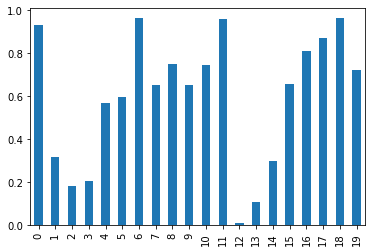

In [23]:
 # skapa ett initialt värde för att se till att ploten kan återskapas
np.random.seed(12345)  
s = pd.Series(np.random.rand(20) )
# plotta ett stapeldiagram med de genererade värdena från pandas Series.
s.plot(kind='bar')

I stapeldiagrammet ovan använde vi oss av pandas inbyggda funktionalitet. Det går lika bra att använda matplotlib direkt. 
Då behöver istället två parametrar - en för antalet staplar och en för själva pandas Series med de värden vi vill plotta. 
Då behöver vi också explicit kalla på funktionen `show()` för att producera grafen. 

Att det ser annorlunda ut beror på att det i matplotlib finns ett defaultvärde på tjockleken på staplarna, som också kan ändras

~~~
plt.bar(range(len(s)),s,width = 0.5)   # default är 0.8
~~~

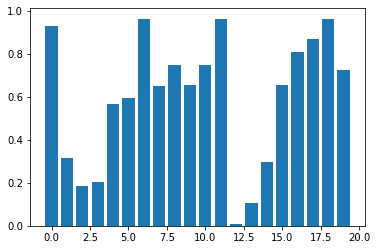

In [24]:
plt.bar(range(len(s)), s)
plt.show()

Vi kan också göra beräkningar för x eller y som vi direkt visar i en plot

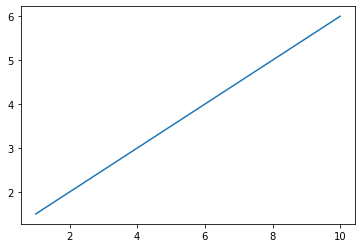

In [25]:
#numpy array med 10 jämt fördelade nummer mellan 1 och 10
x = np.linspace(1,10,10)
plt.plot(x, x/2.+1.)

Det går också att lägga till namn på grafen och axlarna med följande funktioner: `title()`, `xlabel()`och `ylabel()`

Text(0.5, 1.0, 'Plot of the cosine function.')

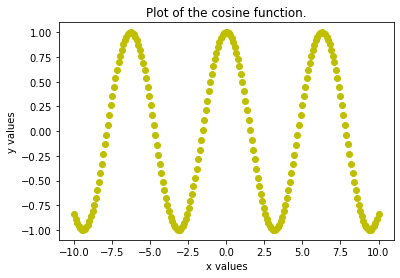

In [26]:
x = np.linspace(-10, 10, 200)
y = np.cos(x)
plt.plot(x, y, 'yo')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Plot of the cosine function.')

Lägga till en legend är också snyggt:

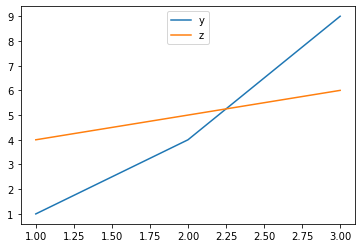

In [27]:
x = [1, 2, 3]
y = [1, 4, 9]
z = [4, 5, 6]
plt.plot(x, y, label='y')
plt.plot(x, z, label='z')
plt.legend(loc='upper center')

Andra användbara funktioner är exempelvis:
    
>`figure()`kan användas för att sätta storleken på fönstret som plotten befinner sig genom att sätta länden på rader och kolumner som en tupel till argumentet `figsize`

~~~
plt.figure(figzise = (5,15))
~~~

**OBS!** För att det ska vara meningsfullt att plotta krävs oftast att du har ett index som är betydelsefullt, alltså inte bara pandas inbyggda automatgenererade index.

Exempel på när index är meningsfullt:

* Du har gjort en .groupby() eller en .value_counts() och därmed skapat en Series från en DataFrame med ett meningsfullt index
* Du har bestämt ett specifikt index med .set_index()

Exempel på parametrar pandas inbygga plot() funktion tar:

* kind — `bar`,`barh`,`pie`,`scatter`,`kde` etc.

* color — Accepterar en array med hexadecimaler motsvarande varje series/kolumn.

* linestyle — `solid`, `dotted`, `dashed` (endast linjegrafer).

* xlim, ylim — specificeras med en tuple (lower limit, upper limit) för vilken ploten kommer dras.

* legend— ett booleanvärde för att bestämma om "förklaring" (legend) ska synas eller ej.

* labels — en lista som motsvarar antalet kolumner i dataframen, en förklarande namn kan läggas till för den förklarande legend. 

* title — titeln på plotten, anges som sträng.

### Histogram

Histogram kan också plottas direkt från pandas eller matplotlib


<AxesSubplot:ylabel='Frequency'>

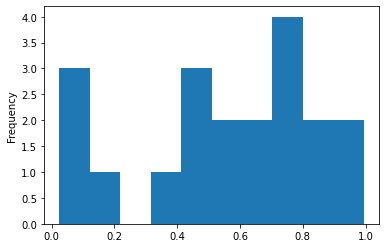

In [28]:
#pandas
s = pd.Series(np.random.rand(20))
# plot the bar chart
s.plot(kind='hist')




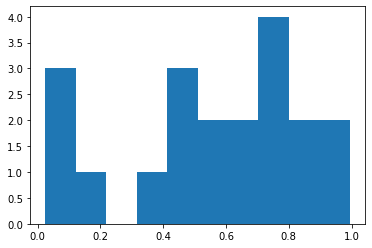

In [29]:
#matplotlib

plt.hist(s)
plt.show()


När vi plottar histogram allokeras varje datapunkt till 1 av 10 lika stora "påsar" som är lika stora längs med x-axeln , antalet datapunkter i varje påse visas på y-axeln

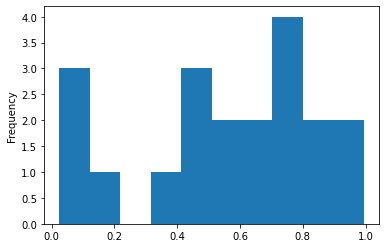

In [30]:
plt.ylabel('Frequency')
plt.hist(s)
plt.show()

Generellt kan alla typer av grafer brytar ner till ett antal element som, även fast de är relaterade till varandra, också kan existera oberoende av varandra.  Det medför att man kan skapa grafer genom att ange vilka element vi vill ska ingå, när vi byggt ihop vår graf så ropar vi på `show()` som visar vårt bygge.

Exempelvis är förklaringarna (the labels) för x och y obereonde av det data som visas, Titel och legend är också oberoende objekt som också kan flyttas runt i grafen. 

Med denna approach går det också att plotta flera grafer i samma graf.

Ett exempel med ett spridningsdiagram visar hur det kan göras. 



### Spridningsdiagram

För att skapa ett spridningsdiagram behöver vi två set med datapunkter, ett för x och ett för y. 

In [31]:
# Genererar data för 2 set med punkter 
x1 = pd.Series(np.random.rand(20) - 0.5 )
y1 = pd.Series(np.random.rand(20) - 0.5 )

x2 = pd.Series(np.random.rand(20) + 0.5 )
y2 = pd.Series(np.random.rand(20) + 0.5 )

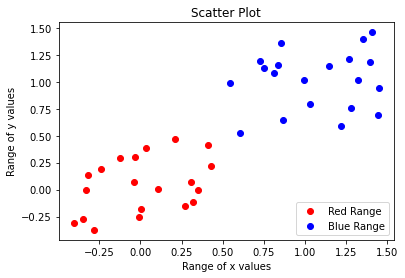

In [32]:
# Lägg till lite andra attribut för grafen
plt.title('Scatter Plot')
plt.ylabel('Range of y values')
plt.xlabel('Range of x values')

# plotta datapunkterna i spridningsdiagrammet
plt.scatter(x1,y1, c='red', label='Red Range' ) 
plt.scatter(x2, y2, c='blue', label='Blue Range')
#var ska rutan med förklaringar stå högst till höger (1), högst till vänster (2) etc. 
plt.legend( loc=4 ) 
# Visa vår skapade graf
plt.show()

### Boxplot

En boxplot ger en enkel representation av olika statistiska kvaliteter på ett set av datavärden. Den är ofta bra om du vill jämföra olika modellers träffsäkerhet med varandra. Då skapar du flera bokplottar i samma graf och kan direkt jämföra dem med varandra. 

Ett annat vanligt användningsområde är att jämföra statistiska variationer mellan olika variabler, som kan vara serier eller kolumner i en dataframe.


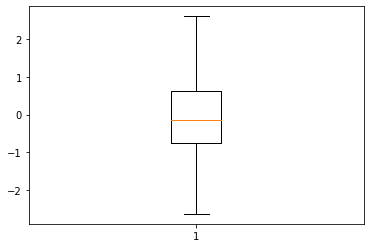

In [33]:
x = pd.Series(np.random.standard_normal(256))

# visa en boxplot av vårt data
plt.boxplot(x)
plt.show()

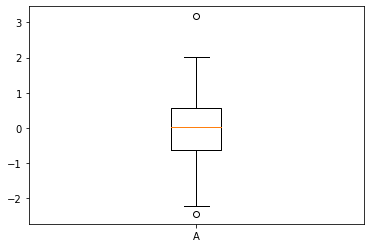

In [34]:
df = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE')) # skapa en dataframe direkt med pandas 
plt.boxplot(df.A, labels = 'A')
plt.show()

Hur gör vi för att visa de olika kolumnerna `A` , `C` och `D` alla visas i samma graf?

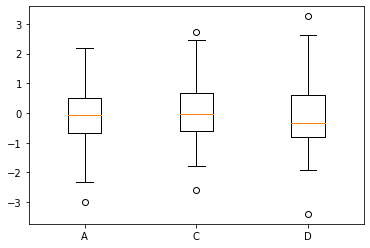

In [35]:
df = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE'))
plt.boxplot([df.A, df.C, df.D], labels = ['A', 'C', 'D'])
plt.show()

Vad är de små cirklarna som inte ligger i boxen?

<AxesSubplot:>

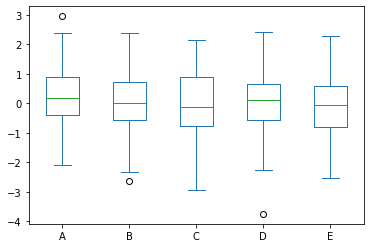

In [36]:
#plotta direkt med pandas
df = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE'))
df.plot(kind = 'box', return_type='axes')

Man kan också spara sin graf som pdf exempelvis. Kan vara bra om man vill kunna använda det i något helt annat sammanhang. 

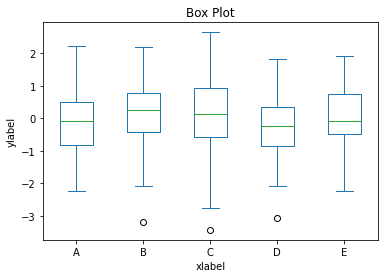

In [37]:
df = pd.DataFrame(np.random.normal(size=(100,5)), columns=list('ABCDE'))
df.plot(kind = 'box', return_type='axes')

plt.title('Box Plot')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
#plt.show()
plt.savefig('boxplot_from_df.pdf')

Vi testar att plotta vårt "gamla" dataset olympics eller snarare olympics_clean. Vi tar en titt på den igen:

In [38]:
olympics_clean.head()

,Summer_olympics,Gold,Silver,Bronze,Total_summer,Winter_olympics,Gold_winter,Silver_winter,Bronze_winter,Total_winter,Games_total,Gold_total,Silver_total,Bronze_total,Medals_total
Country,,,,,,,,,,,,,,,
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


<AxesSubplot:xlabel='Country'>

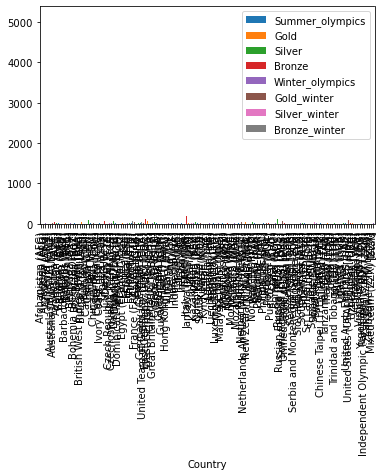

In [39]:
olympics_cleaner.reset_index()

olympics_cleaner.T.head()

olympics_cleaner.plot(kind='bar')
#olympics_cleaner.plot(x= "Summer_olympics", y= "Country", kind='bar')
#olympics_cleaner.plot(x= "Winter_olympics", y= "Country", kind='bar')

Det där blev ju inte toppensnyggt, vi ser i princip ingenting förutom informationen om vilka kolumner de olika färgerna representerar. Det är uppenbarligen ingen bra idé att plotta raderna på x-axeln. Vi passar på att kolla hur många rader och kolumner det egentligen är i vårt dataset.


Varför blir det så tokigt? 

Vårt dataset har 147 rader, att plotta alla dem i en plot blir inte riktigt bra. Ingen idé att försöka plotta hela dataframen alltså. 

Däremot kan det ändå finnas värde i att plotta, det kan ge information som vi är intresserade av att förstå ändå. Dock hinner vi inte gå in på det här, utan det får ni gärna testa själva. 


### Korrelationsvisualisering med Seaborn (heatmap)


I seaborn biblioteket finns lite coolare visualiseringar jämfört med matplotlib, den är också lite enklare att förstå och använda. 

En användbar funktion är bland annat att ta reda på hur korrelationerna ser ut i ett dataset med hjälp av en heatmap

In [40]:
# import av seabornebiblioteket
import seaborn as sns
olympics_corr=olympics_cleaner.reset_index()
olympics_corr
 


,Country,Summer_olympics,Gold,Silver,Bronze,Winter_olympics,Gold_winter,Silver_winter,Bronze_winter
0,Afghanistan (AFG),13,0,0,2,0,0,0,0
1,Algeria (ALG),12,5,2,8,3,0,0,0
2,Argentina (ARG),23,18,24,28,18,0,0,0
3,Armenia (ARM),5,1,2,9,6,0,0,0
4,Australasia (ANZ) [ANZ],2,3,4,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
142,Independent Olympic Participants (IOP) [IOP],1,0,1,2,0,0,0,0
143,Zambia (ZAM) [ZAM],12,0,1,1,0,0,0,0
144,Zimbabwe (ZIM) [ZIM],12,3,4,1,1,0,0,0
145,Mixed team (ZZX) [ZZX],3,8,5,4,0,0,0,0


In [41]:
#droppa alla vinter_os kolumner
olympics_corr=olympics_corr.drop(columns=list(olympics_corr)[5:8])

olympics_corr.head()


,Country,Summer_olympics,Gold,Silver,Bronze,Bronze_winter
0,Afghanistan (AFG),13,0,0,2,0
1,Algeria (ALG),12,5,2,8,0
2,Argentina (ARG),23,18,24,28,0
3,Armenia (ARM),5,1,2,9,0
4,Australasia (ANZ) [ANZ],2,3,4,5,0


In [44]:
#calculate the correlation matrix

Var_corr = olympics_corr.corr()
Var_corr
#plot the heatmap and annotation on it


,Summer_olympics,Gold,Silver,Bronze,Bronze_winter
Summer_olympics,1.000000,0.224360,0.227158,0.225742,0.233963
Gold,0.224360,1.000000,0.998612,0.996652,0.980427
Silver,0.227158,0.998612,1.000000,0.999367,0.984704
Bronze,0.225742,0.996652,0.999367,1.000000,0.986290
Bronze_winter,0.233963,0.980427,0.984704,0.986290,1.000000


<AxesSubplot:>

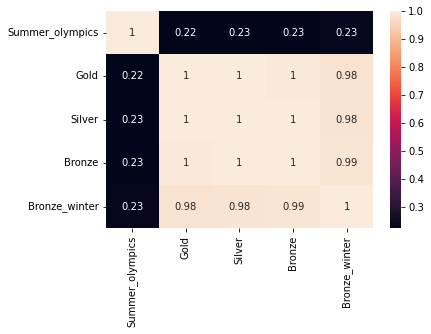

In [48]:
sns.heatmap(Var_corr, xticklabels=Var_corr.columns, yticklabels=Var_corr.columns, annot=True)
